
#### Problem Statement



Create a graph function that takes any dataset and create a boxplot and a histogram for numerical variables and a barplot for categorical variables and save them as PNG files in a specified repository. If no repository is specified then by default the graphs get stored in the working directory. The functions also give an additional argument to the user to choose a list of columns. If no list of columns is given the default setting must choose all the columns of the dataset.


**graphs(data, cols, directory)**

**data:** the data frame of interest

**cols:** the columns of interest (default: the list of all the columns)

**directory:** a link to a location in the system (default: the current working directory)

**Output:**

PNG files of the histogram & boxplot of all the numerical variables (given in the column set) and the bar plot of all the categorical variables given in the column set. The filename of the image files should be the name of the variable.


**Example:**

graphs(cars, cols=[“MPG”, “Origin”,“Weight”])


**--> Return graphs for only the three variables in the list and store it in the working directory**

**Example:**

graphs(cars, directory =“../c/desktop..”)


**--> Return graphs for all the columns and save the graph in the specified directory**


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def graphs(data, cols = 'all', directory= './'): # function definition containing 3 parameters: data,cols and directory
    
    # Declaration of variables
    
    count = 0                      # declaring count
    numerical_columns_list = []    # list used to store numerical columns
    object_columns_list = []       # list used to store categorical columns
    
    object_columns = data.select_dtypes(include = ['object'])      # saving the data frame containing categorical columns.
    numerical_columns = data.select_dtypes(include = ['number'])   # saving the data frame containing numerical columns.
    
    # Dividing columns into numerical and categorical, then saving them to respective lists.

    if cols == 'all':                                               # for default parameter cols(every column should be considerd)        
        for p in object_columns:                                    # using for loop to append all the categorical columns to a list
            object_columns_list.append(p)
      
        for p in numerical_columns:                                 # using for loop to append all the numerical columns to a list
            numerical_columns_list.append(p)   
            
    else:                                                           # when cols parameter is passed in the function call
        for p in object_columns:                                    # iterating every category column from the given data
            for q in cols:                                          # iterating every element in the passed list of cols
                if q == p:                                          # checking if iterated category column is present in the cols list 
                    count = count + 1                               # increasing the count value
            if count != 0:                                          # for every column in check the count value, if count != 0, the column should added to the list
                object_columns_list.append(p)                       # appending the column to categorical list
            count = 0                                               # reassigning count to 0 for the next iteration

        for m in numerical_columns:                                 # iterating every numeric column from the given data set
            for n in cols:                                          # iterating every element in the passed list of cols
                if n == m:                                          # checking if iterated category column is present in the cols list
                    count = count + 1                               # increasing the count value
            if count != 0:                                          # for every column in check the count value, if count != 0, the column should added to the list
                numerical_columns_list.append(m)                    # appending the column to numerical column list
            count = 0                                               # reassigning count to 0 for the next iteration

    # Saving bar plot for categorical columns
    
    if len(object_columns_list) != 0:                  # Checking if any categorical columns are present or not
        for j in object_columns_list:                  # Iterating every coulumn name
            data[[j]].value_counts().plot(kind = 'bar',figsize = (10,8),color = 'coral', fontsize = 13)  # bar plot syntax
            plt.xlabel(j,fontsize = 12)                # fixing x-label
            plt.ylabel("Frequency",fontsize =13)       # fixing y-label
            plt.title("Barplot of "+j,fontsize = 16)   # fixing title
            plt.savefig( directory + '//' + j + '.png',bbox_inches = "tight")  # saving the figure to the respective directory
            
    # Saving box plot and histogram for numerical columns

    if len(numerical_columns_list) != 0:               # Checking if any numerical columns are present or not 
        for i in numerical_columns_list:               # Iterating every coulumn name
            fig = plt.figure(figsize=(8,15))           # fixing plot fig size to large values to avoid overlapping of two plots

            plt.subplot(2,1,1)                         # first subplot for box plot
            data.boxplot(column=i,notch = True,grid = False,figsize = (7,5),vert = False)   # box plot syntax
            plt.xlabel(i,fontsize = 12)                # fixing x-label
            plt.yticks(ticks = [])                     # removes y-axis label
            plt.title("Boxplot of "+ i,fontsize = 15)  # fixing title

            plt.subplot(2,1,2)                         # second subplot for histogram
            plt.hist(data[[i]],color='orange',edgecolor="black") # histogram syntax
            plt.xlabel(i,fontsize = 12)                # fixing x-label
            plt.ylabel("Frequency",fontsize =12)       # fixing y-label
            plt.title("Histogram of "+i,fontsize = 15) # fixing title


            plt.savefig( directory + '//' + i +'.png',bbox_inches = "tight") # saving the figure to the respective directory

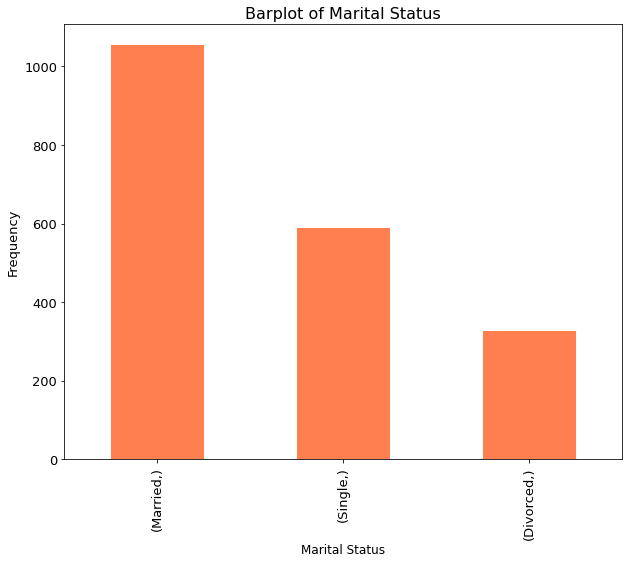

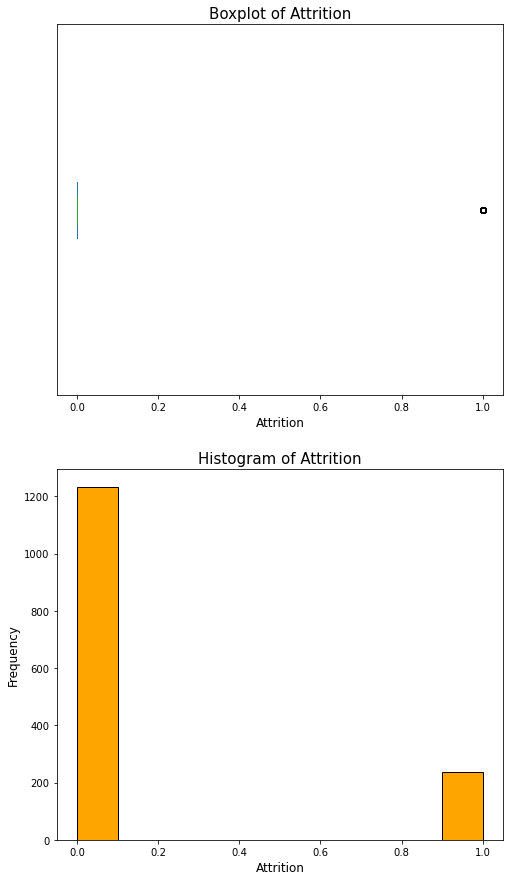

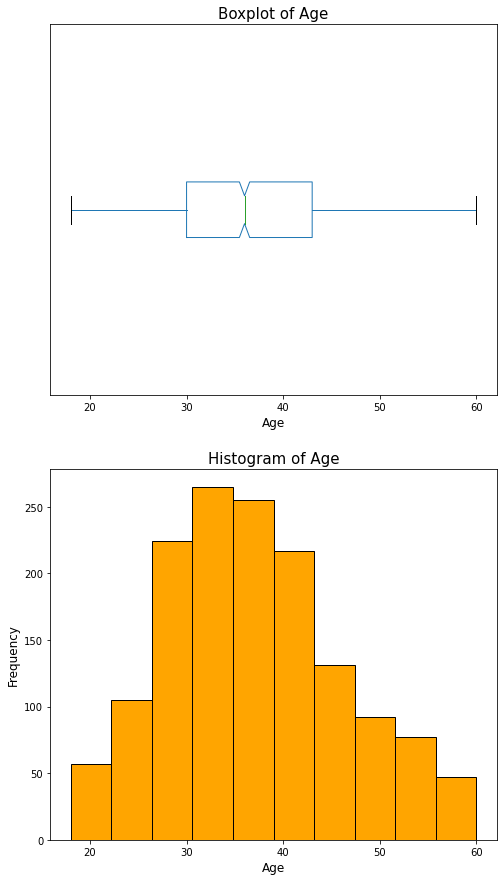

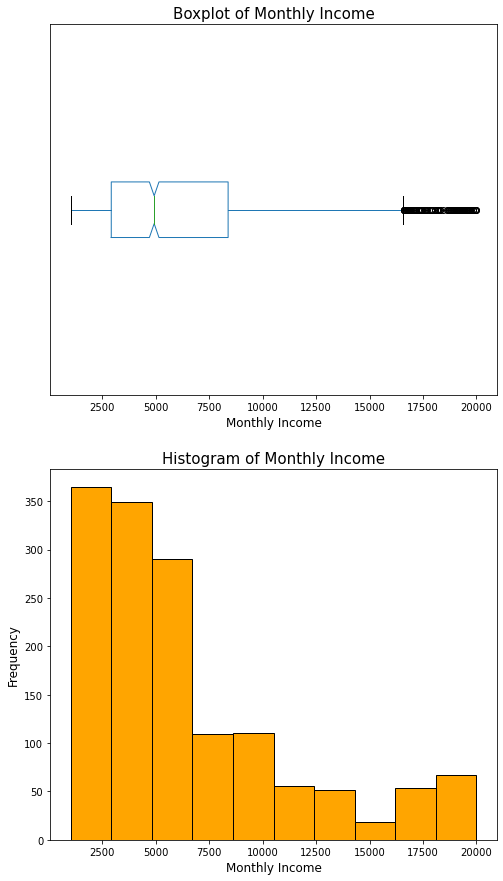

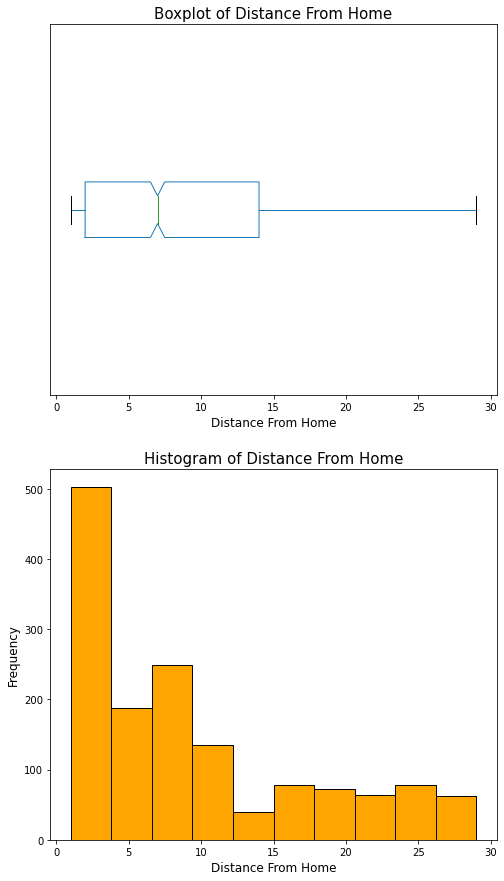

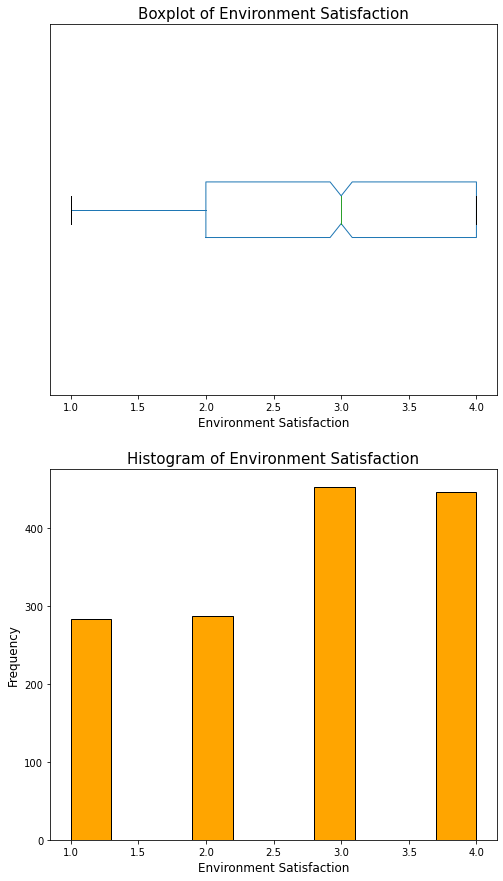

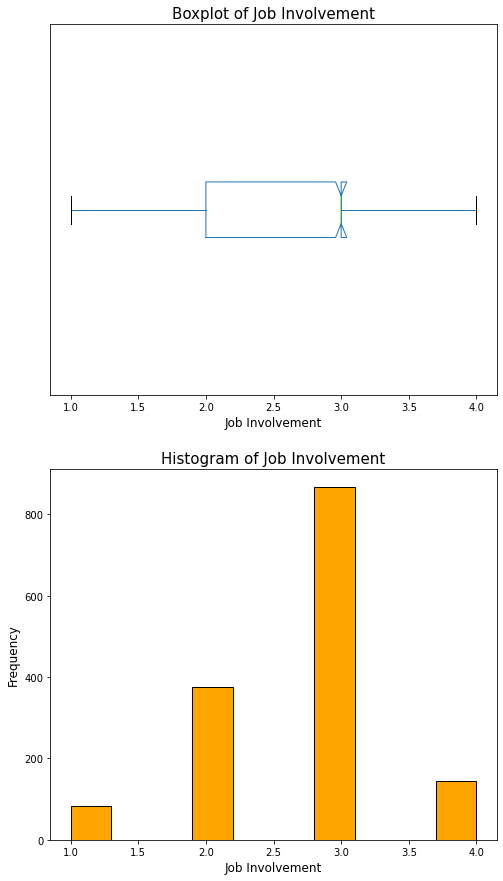

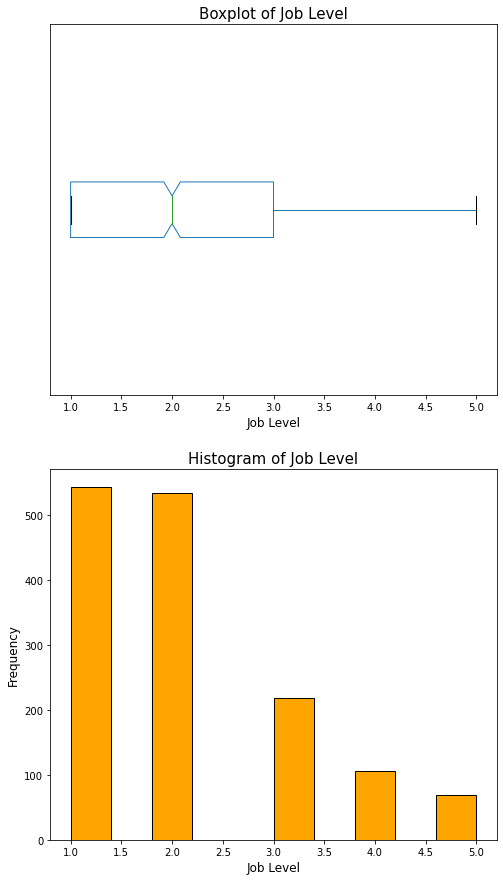

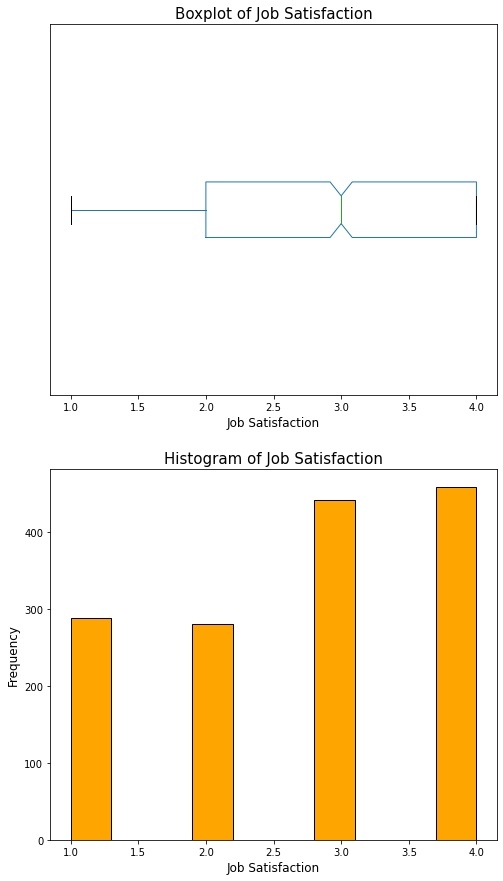

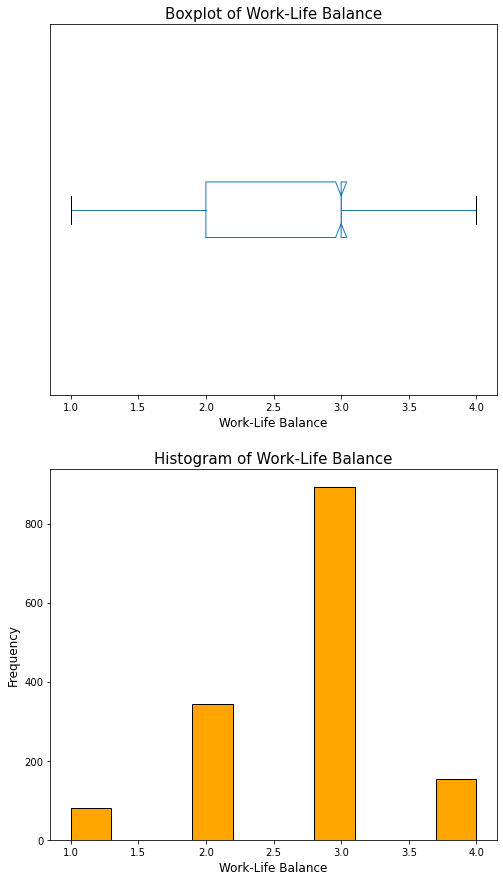

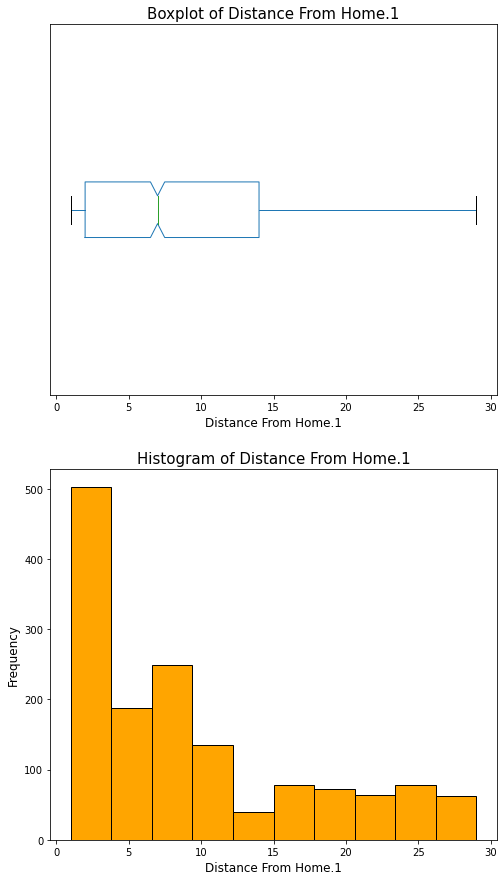

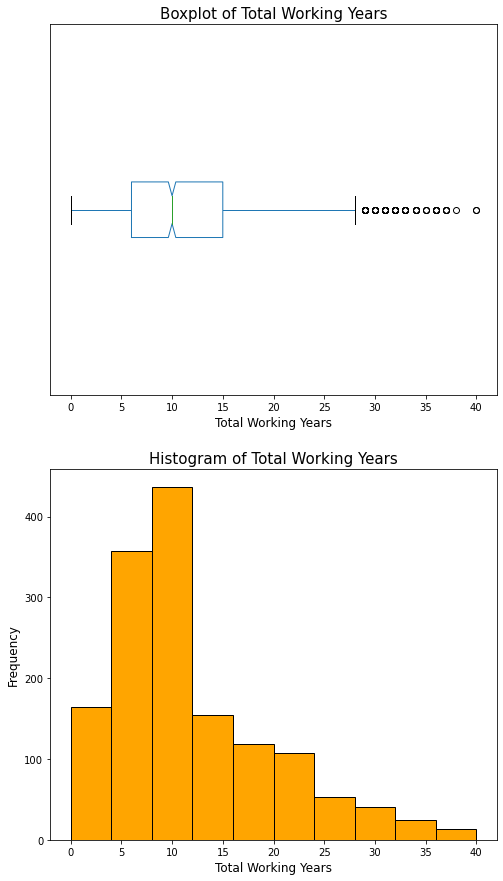

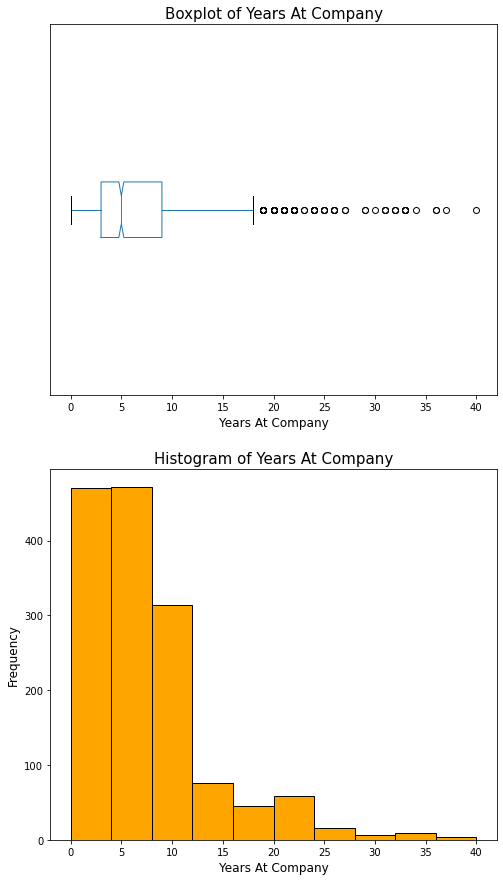

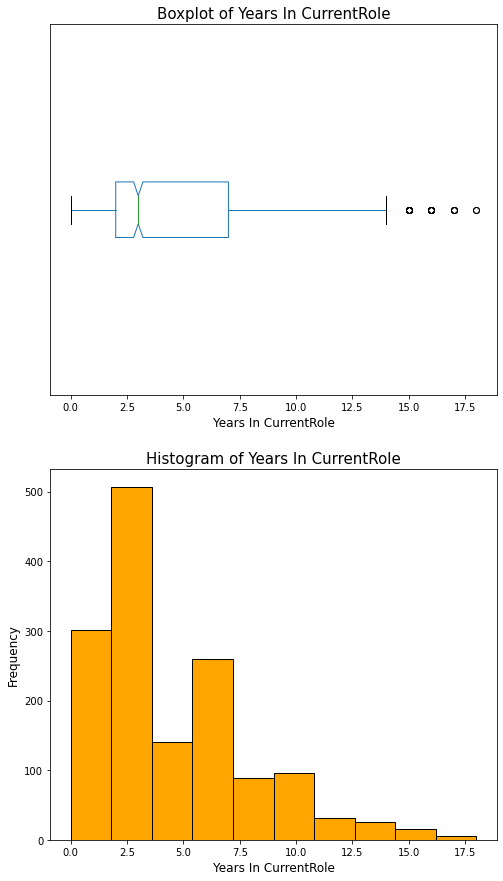

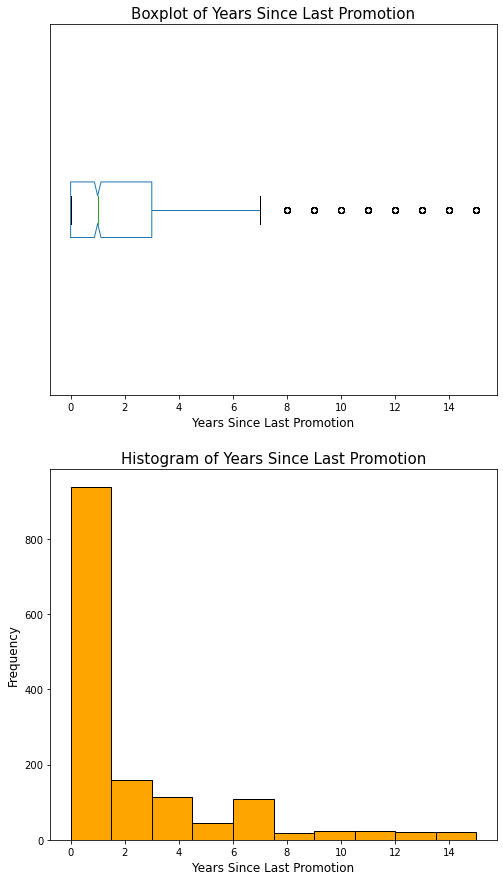

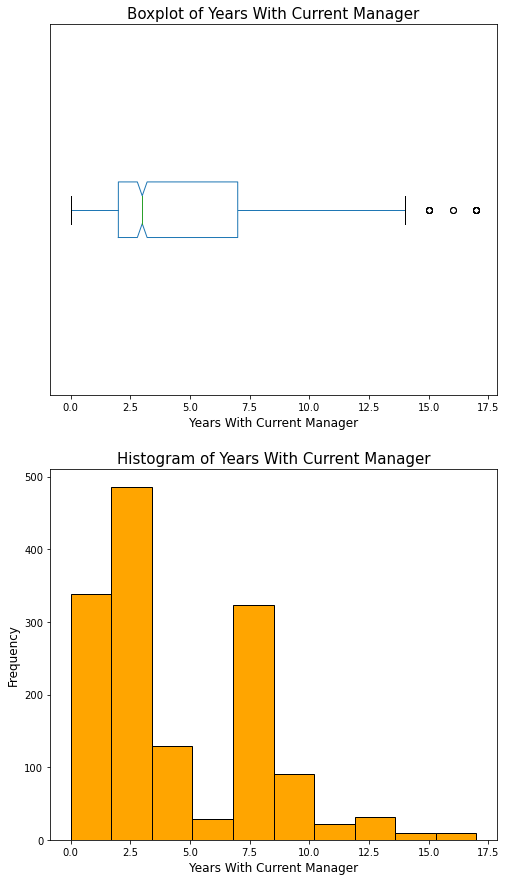

In [12]:
#Function calls
hr = pd.read_excel("C:\\Users\\llohi\\OneDrive\\Desktop\\python\\HR - Attrition.xlsx")
#graphs(hr)
#graphs(hr,cols = ["Marital Status","Age"])
#graphs(hr,cols = ["Marital Status","Age"],directory = r'C:\Users\llohi\OneDrive\Desktop\python\test_figs')
graphs(hr,directory = r'C:\Users\llohi\OneDrive\Desktop\python\test_figs')

# Explanation

## Problem Statement :

Create a graph function that takes any dataset and create a boxplot and a histogram for numerical variables and a barplot for categorical variables and save them as PNG files in a specified repository. If no repository is specified then by default the graphs get stored in the working directory. The functions also give an additional argument to the user to choose a list of columns. If no list of columns is given the default setting must choose all the columns of the dataset.


## Objective :

**Function Structure:**

**graphs(data, cols, directory)**

**data:** the data frame of interest

**cols:** the columns of interest (default: the list of all the columns)

**directory:** a link to a location in the system (default: the current working directory)

**Approach:**

- To achieve the desired plots, we take the data and cols from the function call. 
- If cols is not given in the function call, by default it takes all the columns in the data set. 
- Then we have splitted the columns into categorical columns and numerical columns and saved them to separate lists.
- By iterating every item in the lists we have plotted bar plot for categorical columns and box plot, histogram for numerical columns.
- Saved the plots in the desired location, either default location or given(in the function call) location.

## Expectations:

- It is expected that this function can be used for any dataset to better understand the  KPIs and gives a quick visual representattion of the same. Below are the various function calls which can be used.
      graphs(data)
      graphs(data,cols = ["column list"])
      graphs(data,directory ='path\\to\\save\\plots')
      graphs(data,cols = ["column list"],directory = 'path\\to\\save\\plots')

#### Examples

**graphs(iris) :**

This function call saves the plots for all the columns of the data in the current working directory. 

**graphs(iris,cols = ["sepal_length","species","petal_length"]) :**

This function call saves the plots for the given columns of the data in the current working directory.

**graphs(iris,directory = 'C:\\Users\\llohi\\OneDrive\\Desktop\\python\\test_figs') :**

This fucntion call saves all the plots of the gives data in the provided directory.

**graphs(iris,cols = ["sepal_length","species","petal_length"],directory = 'C:\\Users\\llohi\\OneDrive\\Desktop\\python\\test_figs') :**

This function call saves the plots for the given columns of the data in the provided directory.

## Algorithm:

**function definition** graphs(data, cols = 'all', directory = './')

    if default parameter for cols then
    
         assign categorical columns from the data to variable
         for every category column name do
             append the column to a categorical list
         end for
         
         assign numerical columns from the data to variable
         for every numerical column name do
             append the column to a numerical column list
         end for
         
    else then
         assign categorical columns from the data to variable
         for columns in categorical columns do
              for columns in parameter cols do
                  if the names matches then
                      increase the count
                  end if
              end for
              if count != 0 then
                  append the column to the categorical list
              end if
         end for
         
         assign numerical columns from the data to variable
         for columns in numerical columns do
              for columns in parameter cols do
                  if the names matches then
                      increase the count
                  end if
              end for
              if count != 0 then
                  append the column to the numerical list
              end if
         end for
    end if         
    
    
    if len of categorical column list != 0 then
        for every column name in categorical column list do
             plot the bar plot
             save figure to the directory(either default or from the function call)
        end for
    end if
    
    if len of numerical column list != 0 then
        for every column name in numerical column list do
            assign subplot 1
            plot the box plot
            
            assign subplot 2
            plot the histogram
            save figure to the directory(either default or from the function call)
        end for
    end if






## YouTube Link :

https://youtu.be/yXmmfWKQFjs
